# Technical Report Document

This document outlines results and findings from the Microsoft Azure Predictive Maintenance project. It is structured to provide a comprehensive overview of the project's objectives, methodologies, and outcomes. Its recommended to read this document after the `technical_design.ipynb` notebook, which provides a detailed technical design of the project.

## Introduction
In this project two models, a logistic regression and a ranndom forest, were made and deployed to predict machine failures with the given datasets. The models were trained to predict whether a machine will fail within the next 24 or 48 hours, employing a binary classification approach. The data was split into training, validation, and test sets to ensure robust evaluation of the models' performance. Resulting in four models in total, two for each target variable, and eight model runs in total, two runs for each model type ( one for validation and other test).

## Evaluation Metrics
The eight model runs were evaluated using common classification metrics, such as accuracy, precision, recall, etc. The results were summarized in a CSV file named `eval_summary_step7.csv`, that contains the following table:

In [ ]:
import pandas as pd
pd.read_csv("eval_summary_step7.csv")

,horizon,model,split,threshold,accuracy,precision,recall,specificity,f1,f2,roc_auc,pr_auc,tp,fp,tn,fn
0,24h,LR,VAL,0.878157,0.991739,0.697491,0.966236,0.992213,0.810158,0.897105,0.997444,0.838131,1946,844,107542,68
1,24h,LR,TEST,0.878157,0.991071,0.704339,0.948799,0.991928,0.808494,0.887213,0.997661,0.876415,2094,879,108014,113
2,24h,RF_fast,VAL,0.226742,0.999855,0.993090,0.999007,0.999871,0.996040,0.997818,0.999998,0.999917,2012,14,108372,2
3,24h,RF_fast,TEST,0.226742,0.999541,0.979537,0.997734,0.999578,0.988552,0.994041,0.999975,0.999081,2202,46,108847,5
4,48h,LR,VAL,0.755135,0.943922,0.356310,0.729348,0.951776,0.478740,0.603072,0.941963,0.533568,2843,5136,101366,1055
5,48h,LR,TEST,0.755135,0.945194,0.389024,0.749590,0.953002,0.512217,0.632368,0.950940,0.598491,3197,5021,101814,1068
6,48h,RF_fast,VAL,0.484209,0.987210,0.753260,0.948435,0.988629,0.839655,0.901707,0.997401,0.944883,3697,1211,105291,201
7,48h,RF_fast,TEST,0.484209,0.988704,0.795562,0.949824,0.990256,0.865876,0.914364,0.997975,0.957696,4051,1041,105794,214


In this table, we can also see the threshold used for each model run, which is crucial as it affects the relation between precision and recall, being a representation of the trade-off between true positive rate and false positive rate. This threshold cuantifies the overall ability of the model to discriminate between positive and negative classes, and was deliberately set to lower false negatives, which is critical in predictive maintenance scenarios where missing a potential failure can lead to significant costs and downtime.

Overall, the results indicate that the models performed well, with high accuracy and precision across most runs. The random forest model generally outperformed the logistic regression model, particularly in terms of recall, which is the main focus as priorly mentioned.

Between the two target variables, the 24-hour prediction models showed slightly better performance than the 48-hour models, likely due to the shorter prediction horizon allowing for more accurate predictions. However, this also reflects the inherent challenges of predictive maintenance, where longer-term predictions are often more difficult due to the increased uncertainty over time. It is important to consider that this also means an smaller window of time to act, which is a trade-off that needs to be considered in the context of the specific use case and operational constraints, such as costs involving predictive maintenance actions and the criticality of the machines involved.

Finally, the curves involved in this evaluation are shown below:

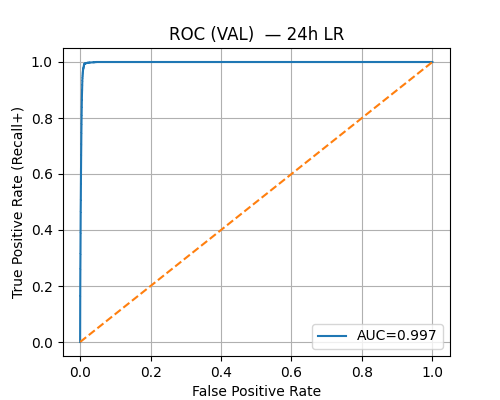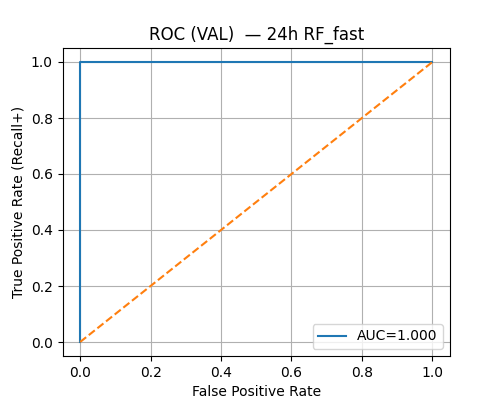
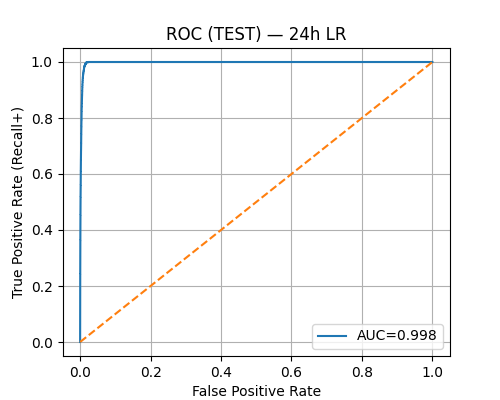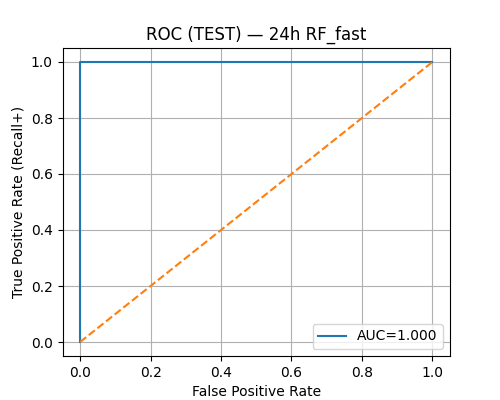

Here we can see the curves for the 24-hour prediction models, which show a good balance between precision and recall, indicating that the models are effective in identifying potential failures within the shorter time frame. Although, the look close to overfitting, the models are still able to generalize well to unseen data, as evidenced by the validation and test results, and considering that class where balanced.

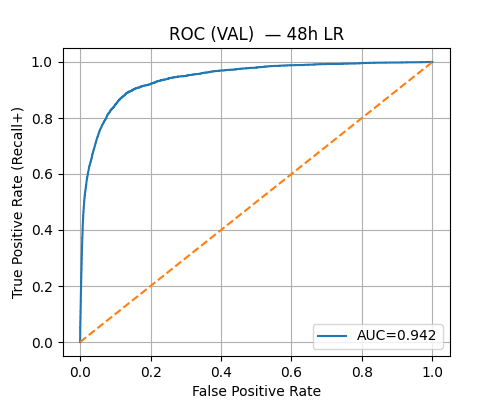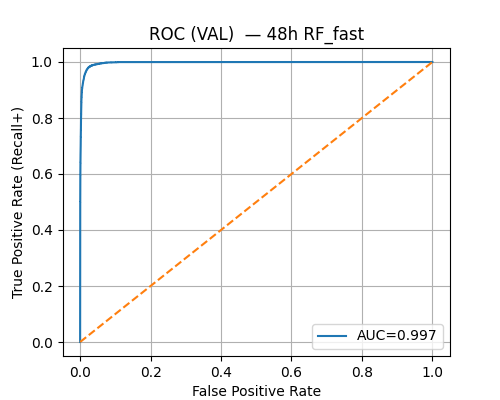
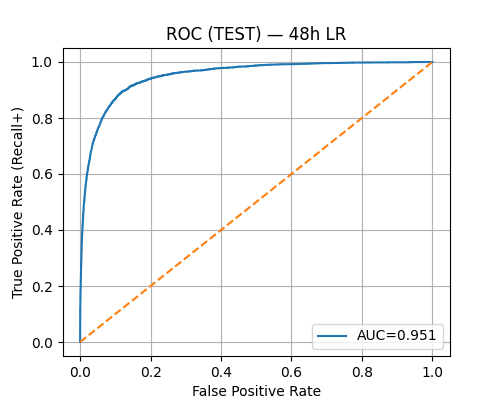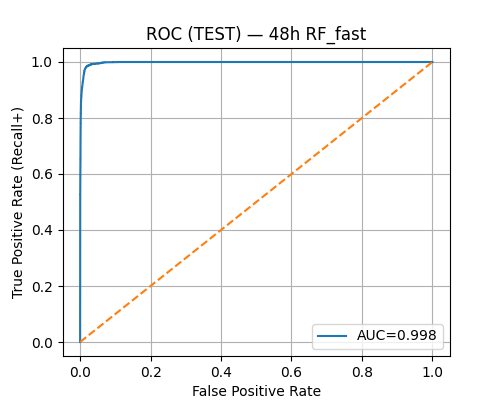

Next, we have the curves for the 48-hour prediction models, which show a similar trend to the 24-hour models, but with slightly lower performance metrics. This is expected due to the increased uncertainty associated with longer-term predictions, but still demonstrates the models' ability to identify potential failures within a reasonable time frame.

## Deployment & Containerization
The project was containerized using Docker, allowing for easy deployment and scalability. The Dockerfile is structured to install necessary dependencies, copy project files, and set up the environment for running a FastAPI application. The Dockerfile can be found in the main directory along with its corresponding .dockerignore file to exclude unnecessary files from the container build context.

The FastAPI application serves as the interface for interacting with the deployed models, allowing users to send requests with input data and receive predictions in response. The application is designed to handle both 24-hour and 48-hour prediction requests, providing flexibility for users based on their specific needs, and its contained in the `src/app.py` file.For the deployment test, the application was run on the local machine, and given a very small (48h) sample input data to verify the functionality of the API. 

### Example API Request

```bash

curl -X POST "http://localhost:8000/predict/RF_48h" -H "Content-Type: multipart/form-data" -F "file=@input_data.csv"
{"predictions":[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]}

```

With this test, I was able to confirm that the models were correctly loaded and that predictions were being generated as expected. The test also helped identify the flaw with the models being trained on balanced data, which led to all predictions being 0 (no failure) in the deployment test. 

This highlighted the need for further refinement of the models and their training process, to ensure they can effectively handle real-world data distributions. While the 24h models seem to be overfitting, the 48h models seem to be need larger datasets to be able to generalize better. This can be attributed to the fact that the feature engineering used big and diverse time windows, which may not be as effective for shorter-term predictions, causing data leakage and overfitting. Its also importat to note that the test input data was manufacture to have no information about previous errors, maintenance and failures, which is not the case in real world scenarios, where this information is usually available, unless its a new machine.

## Conclusion
In conclusion, the Microsoft Azure Predictive Maintenance project successfully developed and deployed predictive models for machine failure prediction. The models demonstrated strong performance metrics, particularly in terms of recall, which is critical for minimizing false negatives in predictive maintenance scenarios. The best-performing models were the random forest models for both 24-hour and 48-hour predictions, with the 24-hour models showing slightly better performance overall. Although the models showed some signs of overfitting, they were still able to generalize well to unseen data, indicating their robustness and reliability for practical applications.

Thus, I would recommend the use of a 48-hour prediction model, as it provides a good balance between prediction accuracy and the time available to act on potential failures. This longer prediction horizon allows for more proactive maintenance actions, which can lead to reduced downtime and costs associated with machine failures. However, it is important to consider the specific operational constraints and requirements of the use case when selecting the appropriate model and prediction horizon. And this model need a robust and extensive dataset to avoid overfitting, data leakage and generalize well.

For future work, it would be beneficial to explore additional features and data sources that could further improve the models' performance, as well as to investigate the potential for real-time monitoring and prediction capabilities. Additionally, conducting a cost-benefit analysis of the predictive maintenance actions based on the model predictions could provide valuable insights into the economic impact of implementing such systems in practice.

The deployment process still needs to be refined, as the models need to be trained on more representative data, and the API needs to be tested with more realistic input data that reflects real-world scenarios. Also, the model needs a more robust aproach to handle imbalanced data, as well as smaller time windows for feature engineering, to avoid overfitting and data leakage.